<a href="https://colab.research.google.com/github/skander-kerkeni/Predict_if_it_s_photo_or_other/blob/training/Livrable1_Version0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font size=15 color='992208'><center>Livrable 1</center></font> 

**Importation des libraries**


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Importer le dossier de dataset à partir de système de fichiers local**

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Exctaction du fichier "Dataset.rar"**

In [ ]:
#cd /content/drive/MyDrive/
#!unrar x Dataset_L1.rar

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Extracting  Dataset_L1/photo/photo_5001.jpg                               78%  OK 
Extracting  Dataset_L1/photo/photo_5002.jpg                               78%  OK 
Extracting  Dataset_L1/photo/photo_5003.jpg                               78%  OK 
Extracting  Dataset_L1/photo/photo_5004.jpg                               78%  OK 
Extracting  Dataset_L1/photo/photo_5005.jpg                               78%  OK 
Extracting  Dataset_L1/photo/photo_5006.jpg                               78%  OK 
Extracting  Dataset_L1/photo/photo_5007.jpg                               78%  OK 
Extracting  Dataset_L1/photo/photo_5008.jpg                               78%  OK 
Extracting  Dataset_L1/photo/photo_5009.jpg                               78%  OK 
Extracting  Dataset_L1/photo/photo_5010.jpg                               78%  OK 
Ex

In [34]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [35]:
ls

 checkpoints/        Dataset_L1/      my_model.h5
'Colab Notebooks'/   Dataset_L1.rar   tunisie.jpg


#1) Prepare training data

**2.** Charger les données d’apprentissage, de validation et de test de la dataset respectivement dans des conteneurs de type BatchDataset $train\_ds$ et $val\_ds$. Avec la taille des batch est 128, et la taille des images à $48\times 48$

In [36]:
batch_size = 128
img_height = 48
img_width = 48


**80% des données pour l'apprentissage et 20% pour la validation**

In [37]:
train_ds = tf.keras.utils.image_dataset_from_directory(
   directory="Dataset_L1",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20574 files belonging to 2 classes.
Using 16460 files for training.


In [38]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory="Dataset_L1",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20574 files belonging to 2 classes.
Using 4114 files for validation.


**Les classes du model**

In [39]:
class_names = train_ds.class_names
print(class_names)

['non-photo', 'photo']


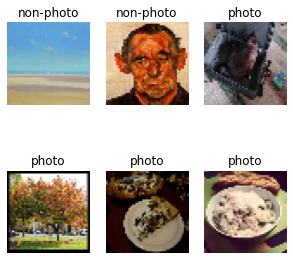

In [40]:
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
    for i in range(6):
      ax = plt.subplot(2, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 48, 48, 3)
(128,)


#2)Train model

In [41]:


model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2)
])

In [42]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:

history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
129/129 [==============================] - 147s 1s/step - loss: 0.3439 - accuracy: 0.8416 - val_loss: 0.3679 - val_accuracy: 0.8384
Epoch 2/3
129/129 [==============================] - 146s 1s/step - loss: 0.3236 - accuracy: 0.8544 - val_loss: 0.3331 - val_accuracy: 0.8561
Epoch 3/3
129/129 [==============================] - 142s 1s/step - loss: 0.2890 - accuracy: 0.8740 - val_loss: 0.3343 - val_accuracy: 0.8624


In [ ]:
model.summary()

**Sauvgarder les poids et le model**

In [ ]:
model.save_weights('./checkpoints/my_checkpoint')

In [ ]:
model.save('my_model.h5')

**Charger les poids**

In [45]:
checkP=model.load_weights('./checkpoints/my_checkpoint')


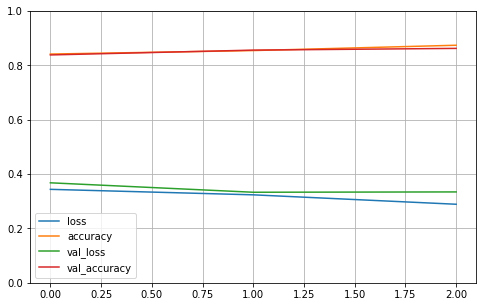

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
loss_t, acc_t = model.evaluate(val_ds)

print(loss_t, acc_t) 


33/33 [==============================] - 24s 583ms/step - loss: 0.3343 - accuracy: 0.8624
0.3343226909637451 0.8624209761619568


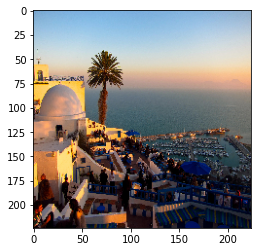

In [26]:
img_path = "/content/drive/MyDrive/tunisie.jpg"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()


**Charger le model**

In [49]:
from tensorflow import keras
reconstructed_model = keras.models.load_model("my_model.h5")

In [50]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9

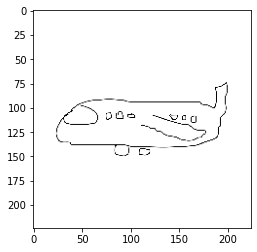

This image is NOT A PICTURE


In [72]:
import numpy as np
from keras.preprocessing import image

img_width, img_height = 48, 48
img = image.load_img('/content/drive/MyDrive/15.png', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)


#Predection
result=reconstructed_model.predict(img)
#Affichage d'image 
img = image.load_img("/content/drive/MyDrive/15.png", target_size=(224, 224))
plt.imshow(img)
plt.show()
#Affichage du resultat
if(result[0][0]>result[0][1]):
  print("This image is NOT A PICTURE")
else:
  print("This image is A PICTURE")

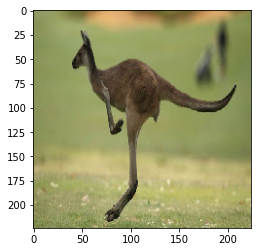

This image is A PICTURE


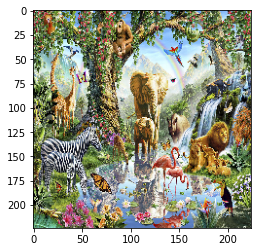

This image is A PICTURE


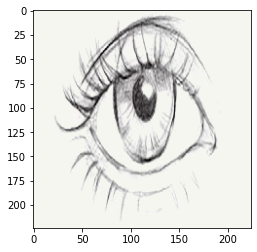

This image is NOT A PICTURE


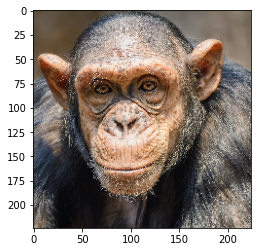

This image is A PICTURE


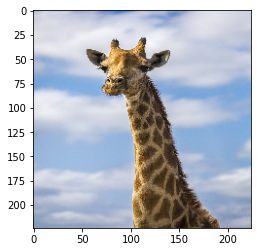

This image is A PICTURE


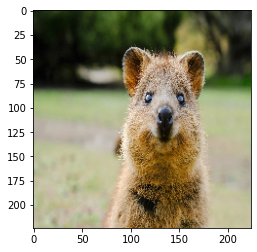

This image is A PICTURE


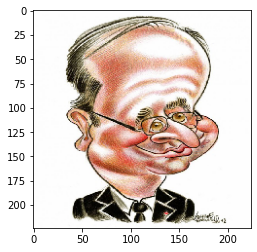

This image is NOT A PICTURE


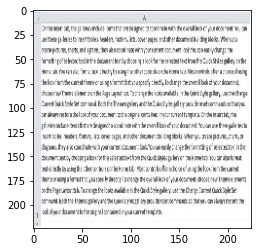

This image is NOT A PICTURE


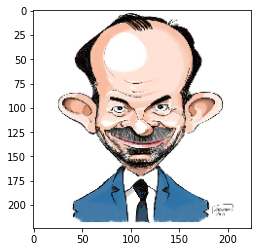

This image is NOT A PICTURE


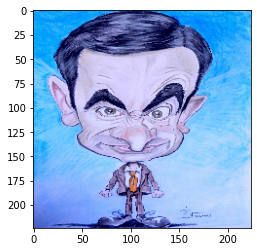

This image is A PICTURE


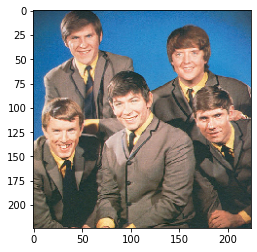

This image is A PICTURE


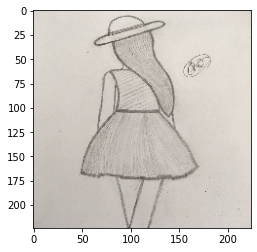

This image is NOT A PICTURE


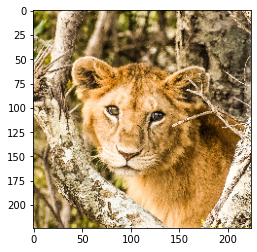

This image is A PICTURE


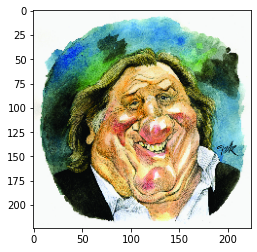

This image is NOT A PICTURE


In [74]:
import numpy as np
from keras.preprocessing import image
import glob
image_list = []
for filename in glob.glob('/content/drive/MyDrive/L1_test/*.jpg'):
  img_width, img_height = 48, 48
  img = image.load_img(filename, target_size = (img_width, img_height))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)


  #Predection
  result=reconstructed_model.predict(img)
  #Affichage d'image 
  img = image.load_img(filename, target_size=(224, 224))
  plt.imshow(img)
  plt.show()
  #Affichage du resultat
  if(result[0][0]>result[0][1]):
    print("This image is NOT A PICTURE")
  else:
    print("This image is A PICTURE")

In [ ]:
from sklearn.metrics import confusion_matrix
des_labels =  np.array([])
for x, y in val_ds:
  des_labels = np.concatenate([des_labels, y])



pred_labels=model.predict(val_ds)

pred_labels =(pred_labels>0.5)


cm = confusion_matrix(des_labels, pred_labels)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')